# System info

- Cation: Sodium (261)
- Anion: Chloride (261)
- Step: 0.05 ns
- Run time: 500 ns
- Number of frames: 10000

## 1. Visualise the density of ions

### Steps: 
1. Run the .tcl script below
4. Graphical representations settings
    - Drawing method: VolumeSlice
    - ColoringMethod: Volume
    - Material: Transpatent
    - Slice axis: X/Y/Z
6. Extensions > Color Scale Bar settings
   - Autoscale: On
   - Use molecule: .dx file
   - Use representation: Volume

In [10]:
!cat tcl/cldensity.tcl

set cl [atomselect top "name CLA"]

volmap density $cl -allframes -combine avg -res 1 -o efcldens.dx

mol load dx efcldens.dx


**Cl- (Vertical cross section)**

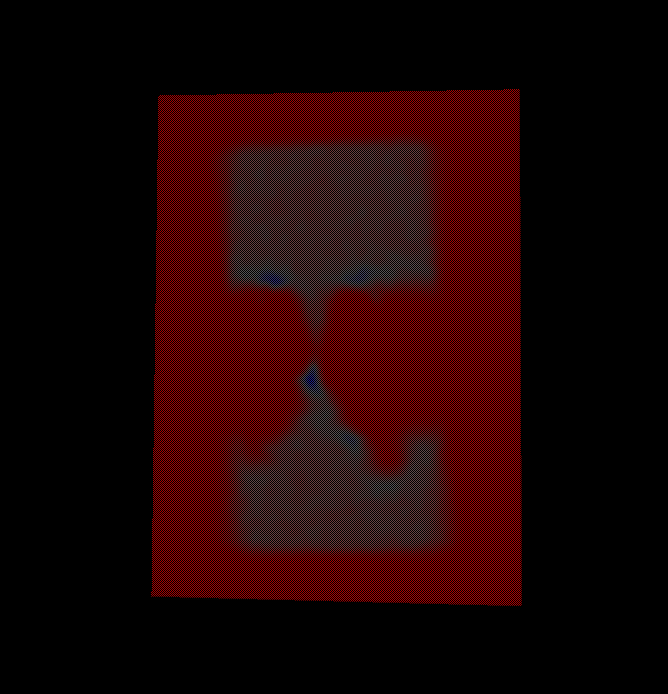

**Na+ (Vertical cross section)**

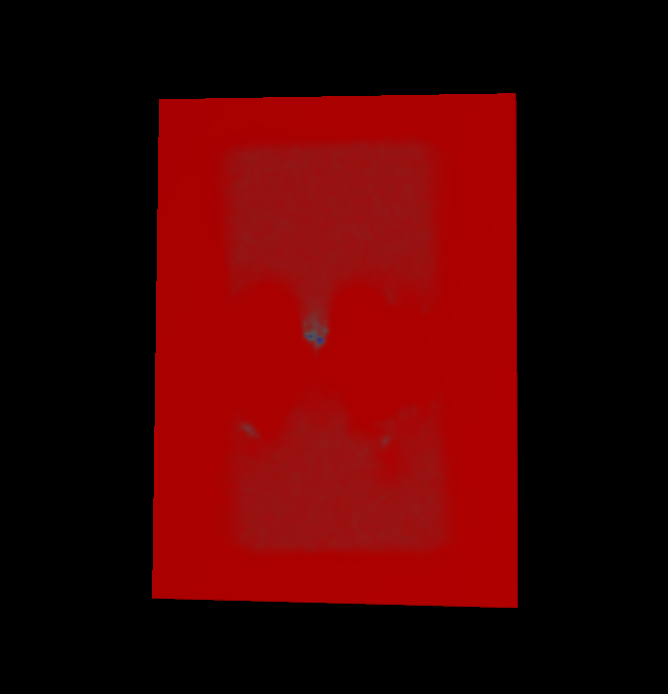

## 2. Calculate the current

The following equation is used to estimate the current,
$$I(t) = \frac{1}{\Delta t L_z} \sum_{i=1}^{N} q_i [z_i(t + \Delta t) - z_i(t)]$$

which is implemented in the .tcl script below.

In [41]:
!diff -y tcl/clElectricCurrentZ.tcl tcl/naElectricCurrentZ.tcl

# Calculate the current for a trajectory. 			# Calculate the current for a trajectory. 
# Results are in "step current(A)"				# Results are in "step current(A)"
								
# Parameters							# Parameters
## dt in s							## dt in s
set dt 5e-11							set dt 5e-11
set startFrame 0						set startFrame 0
set nFrames [molinfo top get numframes]				set nFrames [molinfo top get numframes]
puts [format "Reading %i frames." $nFrames]			puts [format "Reading %i frames." $nFrames]
								
# Output							# Output
set outFile Desktop/clcurrent.dat			      |	set outFile Desktop/nacurrent.dat
								
# System size in A						# System size in A
set lx 68.476							set lx 68.476
set ly 68.476							set ly 68.476
set lz 136.401							set lz 136.401
								
# Open the output file						# Open the output file
set out [open $outFile w]					set out [open $outFile w]
								
# Summation loop						# Summation loop
set sel [atomselect top "name CLA and z > 50 and z < 70"]     |	set sel [atomselect top "name S

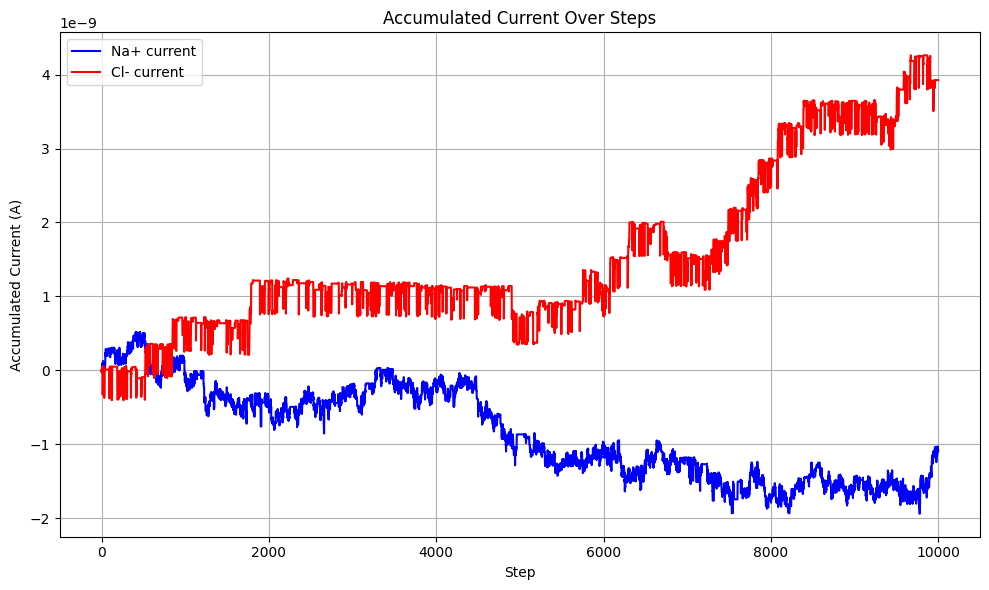

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the first file
data1 = np.loadtxt('/Users/heiley/Desktop/nacurrent.dat')
time1 = data1[:, 0]
current1 = data1[:, 1]
accumulated_current1 = np.cumsum(current1)

# Load the data from the second file
data2 = np.loadtxt('/Users/heiley/Desktop/clcurrent.dat')
time2 = data2[:, 0]
current2 = data2[:, 1]
accumulated_current2 = np.cumsum(current2)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the accumulated current for the first dataset
plt.plot(time1, accumulated_current1, label='Na+ current', color='b')

# Plot the accumulated current for the second dataset
plt.plot(time2, accumulated_current2, label='Cl- current', color='r')

# Adding labels and title
plt.xlabel('Step')
plt.ylabel('Accumulated Current (A)')
plt.title('Accumulated Current Over Steps')
plt.grid()
plt.legend()
plt.tight_layout()

# Save the combined plot
plt.savefig('combined_accumulated_current_plot.png')
plt.show()